In [1]:
import regex as re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import emoji
import os


In [ ]:
import tkinter as tk
from tkinter import filedialog

root = tk.Tk()
root.withdraw()

conversation = filedialog.askopenfilename(
    initialdir=r"D:\whatsApp_group_chat_Analysis",   # FOLDER ONLY
    title="Select WhatsApp Chat File",
    filetypes=[("Text Files", "*.txt")]
)

print("Loaded:", conversation)


In [ ]:
conversation = "D:\whatsApp_group_chat_Analysis\whatsapp-chat-data.txt"
fp = open(conversation, "r", encoding="utf-8")

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\SHIVAM SHARMA\AppData\Local\Temp\ipykernel_6480\2240383693.py:1: SyntaxWarning: invalid escape sequence '\w'
  conversation = "D:\whatsApp_group_chat_Analysis\whatsapp-chat-data.txt"


In [ ]:
def startsWithDateAndTime(s):
    pattern = r"^\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}"
    return bool(re.match(pattern, s))


def getDataPoint(line):
    splitLine = line.split(" - ")
    dateTime = splitLine[0]
    date, time = dateTime.split(", ")
    
    message = " - ".join(splitLine[1:])
    
    if ": " in message:
        author, message = message.split(": ", 1)
    else:
        author = None
    
    return date, time, author, message


In [ ]:
parsedData = []
messageBuffer = []
date, time, author = None, None, None

with open(conversation, encoding="utf-8") as fp:
    fp.readline()  # skip first line (encryption notice)
    
    while True:
        line = fp.readline()
        if not line:
            break

        line = line.strip()
        
        if startsWithDateAndTime(line):
            if len(messageBuffer) > 0:
                parsedData.append([date, time, author, " ".join(messageBuffer)])
            messageBuffer.clear()

            date, time, author, message = getDataPoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)


In [ ]:
df = pd.DataFrame(parsedData, columns=["Date", "Time", "Author", "Message"])
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df.head()


C:\Users\SHIVAM SHARMA\AppData\Local\Temp\ipykernel_6480\3927394317.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


,Date,Time,Author,Message
0,2020-01-24,8:25 pm,None,"Tanay Kamath (TSEC, CS) created group ""CODERS👨..."
1,2020-01-26,4:19 pm,None,You joined using this group's invite link
2,2020-01-26,4:20 pm,None,+91 99871 38558 joined using this group's invi...
3,2020-01-26,4:20 pm,None,+91 91680 38866 joined using this group's invi...
4,2020-01-26,4:22 pm,None,+91 72762 35231 joined using this group's invi...


In [ ]:
print("Total messages:", len(df))
print("Authors:", df["Author"].unique())


Total messages: 13653
Authors: [None '+91 96536 93868' 'Dheeraj Lalwani (TSEC, CS)' '+91 99201 75875'
 '+91 95949 08570' '+91 79778 76844' '+91 90499 38860'
 'Tanay Kamath (TSEC, CS)' 'Saket (TSEC, CS)' '+91 77568 95072'
 'Rohit Pathak (TSEC, CS)' '+91 75078 05454' 'Darshan Rander (TSEC, IT)'
 '+91 79774 68083' '+91 70394 60876' '+91 96191 55044' '+91 90678 93300'
 'Mohit Varma (TSEC, CS)' '+91 79770 56210' 'Chirag Sharma (TSEC, CS)'
 'Vivek Iyer (TSEC, Biomed)' 'Tushar Nankani' '+91 81696 22410'
 '+91 89764 07509' '+91 78758 66747' 'Ankit (TSEC, CS)' '+91 86556 33169'
 '+91 76663 28147' '+91 88284 70904' '+91 97698 67348' 'Vivek (TSEC, CS)'
 'Hardik Raheja (TSEC, CS)' '+91 91680 38866' 'Pranay Thakur (TSEC, CS)'
 'Mittul Dasani (TSEC, CS)' 'Kartik Soneji (TSEC, CS)' '+91 77180 43697'
 '+91 99676 84479' 'Shreya (TSEC, IT)' '+91 96190 16721' '+91 89833 85127'
 '+91 82080 02653' '+91 99675 58551' '+91 90822 59476'
 'Prithvi Rohira (TSEC, CS)' '+91 90820 98830' 'Mohammed (TSEC, EXTC)'
 '+

In [ ]:
def extract_emojis(s):
    return [c for c in s if c in emoji.EMOJI_DATA]

df["Emojis"] = df["Message"].apply(extract_emojis)
all_emoji = sum(df["Emojis"], [])
Counter(all_emoji).most_common(10)


[('😂', 1896),
 ('👍', 365),
 ('🏻', 336),
 ('🔥', 254),
 ('😅', 224),
 ('💯', 185),
 ('♂', 169),
 ('🤦', 136),
 ('🤣', 132),
 ('👏', 103)]

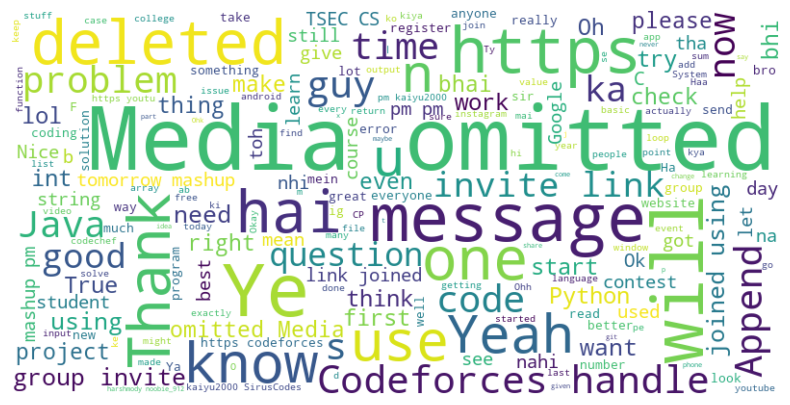

In [ ]:
text = " ".join(df["Message"].dropna())
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    stopwords=STOPWORDS
).generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


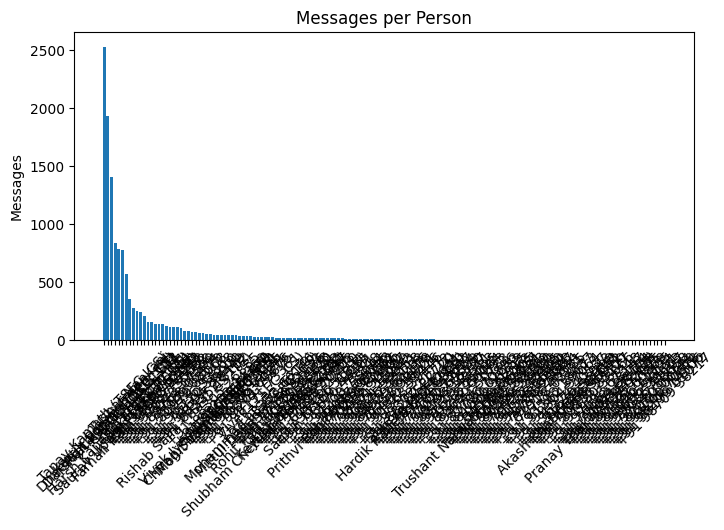

In [ ]:
msg_count = df["Author"].value_counts()

plt.figure(figsize=(8,4))
plt.bar(msg_count.index, msg_count.values)
plt.xticks(rotation=45)
plt.ylabel("Messages")
plt.title("Messages per Person")
plt.show()
